In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report


# 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/economic-data-for-top-50-world-economies-by-gdp/World_Economic_Data_Q1_2020_v1.csv


In [2]:
data = pd.read_csv('/kaggle/input/economic-data-for-top-50-world-economies-by-gdp/World_Economic_Data_Q1_2020_v1.csv')
main_data = data[['Stock_Market_Recovery','Lt_Yc','Mt_Yc','St_Yc','GDP_2019','Real_GDP_Growth','Unemployment','Population','Inflation','Food_Inflation','Interest','Current_Acct_To_GDP','Gold_Tons','Govt_Debt_To_GDP','Household_Debt_To_GDP','Income_Tax','Adjusted_Interest','Real_GDP','Household_Debt_To_Real_GDP','Govt_Debt_To_Real_GDP','Current_Acct_To_Real_GDP']]
print(main_data.head())

   Stock_Market_Recovery  Lt_Yc  Mt_Yc  St_Yc  GDP_2019  Real_GDP_Growth  \
0                 -19.13   38.3   15.2   5.00       2.3              2.4   
1                  -9.36  116.9   49.0  17.60       6.0              6.1   
2                 -19.83   14.4    1.2   2.10       1.7              0.9   
3                 -24.55   24.0    4.8  -0.16       0.4              0.5   
4                 -24.95  186.9   89.0  27.30       4.7              6.1   

   Unemployment  Population  Inflation  Food_Inflation  ...  \
0           4.4       329.0       1.50            1.90  ...   
1           5.9      1400.0       4.30           18.30  ...   
2           2.4       126.0       0.40            1.40  ...   
3           3.2        83.0       1.40            3.60  ...   
4           7.8      1312.0       5.91            8.76  ...   

   Current_Acct_To_GDP  Gold_Tons  Govt_Debt_To_GDP  Household_Debt_To_GDP  \
0                 -2.3    8133.46            106.90                   75.2   
1       

In [3]:
main_data.shape

(47, 21)

In [4]:
main_data.describe()

,Stock_Market_Recovery,Lt_Yc,Mt_Yc,St_Yc,GDP_2019,Real_GDP_Growth,Unemployment,Population,Inflation,Food_Inflation,...,Current_Acct_To_GDP,Gold_Tons,Govt_Debt_To_GDP,Household_Debt_To_GDP,Income_Tax,Adjusted_Interest,Real_GDP,Household_Debt_To_Real_GDP,Govt_Debt_To_Real_GDP,Current_Acct_To_Real_GDP
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,4.700000e+01,47.000000,47.000000,47.000000
mean,-25.218936,2.446809,-23.661702,121.358298,1.128723,2.293617,7.039149,116.931702,3.215957,4.803617,...,1.419149,591.917234,64.606596,55.159574,37.877234,3.912766,2.585709e+12,0.933514,1.479348,-3.401257
std,13.217393,714.288569,524.178225,704.694349,2.809156,1.985864,5.371754,274.063315,7.046867,8.286899,...,5.071945,1361.190999,42.669785,32.739745,11.689482,4.779039,7.617687e+12,1.692236,4.667608,31.086188
min,-98.390000,-4729.500000,-3505.500000,-36.500000,-10.600000,-3.100000,1.000000,2.790000,-0.540000,-1.700000,...,-9.400000,0.000000,14.600000,5.300000,13.000000,0.150000,1.193612e+10,0.010380,0.018830,-203.583780
25%,-30.030000,36.000000,10.550000,0.750000,0.250000,1.000000,3.700000,10.000000,0.500000,1.540000,...,-2.450000,26.485000,36.450000,28.000000,31.000000,2.805000,2.845000e+11,0.323130,0.410020,-2.746860
50%,-24.550000,57.700000,22.100000,5.000000,1.000000,1.900000,5.280000,37.780000,1.500000,2.600000,...,0.500000,120.060000,50.500000,54.400000,38.200000,3.750000,4.310000e+11,0.606140,0.628220,0.537500
75%,-19.275000,109.150000,48.900000,17.550000,1.845000,3.250000,8.050000,91.475000,3.550000,5.900000,...,3.800000,383.995000,83.500000,76.950000,45.000000,4.000000,1.520000e+12,0.943505,1.022210,4.767730
max,-7.700000,500.800000,316.000000,4836.000000,7.900000,7.800000,29.100000,1400.000000,46.900000,54.200000,...,16.900000,8133.460000,238.300000,131.600000,57.200000,34.000000,4.810000e+13,11.537400,32.498000,18.033990


In [5]:
data.dtypes

Country                        object
Stock_Market_Recovery         float64
Lt_Yc                         float64
Mt_Yc                         float64
St_Yc                         float64
GDP_2019                      float64
Real_GDP_Growth               float64
GDP_Deflator                  float64
Unemployment                  float64
Population                    float64
Inflation                     float64
Food_Inflation                float64
Interest                      float64
Current_Acct_To_GDP           float64
Gold_Tons                     float64
Govt_Debt_To_GDP              float64
Household_Debt_To_GDP         float64
Income_Tax                    float64
Adjusted_Interest             float64
GDP                           float64
Real_GDP                      float64
Household_Debt                float64
Household_Debt_To_Real_GDP    float64
Govt_Debt                     float64
Govt_Debt_To_Real_GDP         float64
Current_Acct                  float64
Current_Acct

In [6]:
main_data.isnull().sum()

Stock_Market_Recovery         0
Lt_Yc                         0
Mt_Yc                         0
St_Yc                         0
GDP_2019                      0
Real_GDP_Growth               0
Unemployment                  0
Population                    0
Inflation                     0
Food_Inflation                0
Interest                      0
Current_Acct_To_GDP           0
Gold_Tons                     0
Govt_Debt_To_GDP              0
Household_Debt_To_GDP         0
Income_Tax                    0
Adjusted_Interest             0
Real_GDP                      0
Household_Debt_To_Real_GDP    0
Govt_Debt_To_Real_GDP         0
Current_Acct_To_Real_GDP      0
dtype: int64

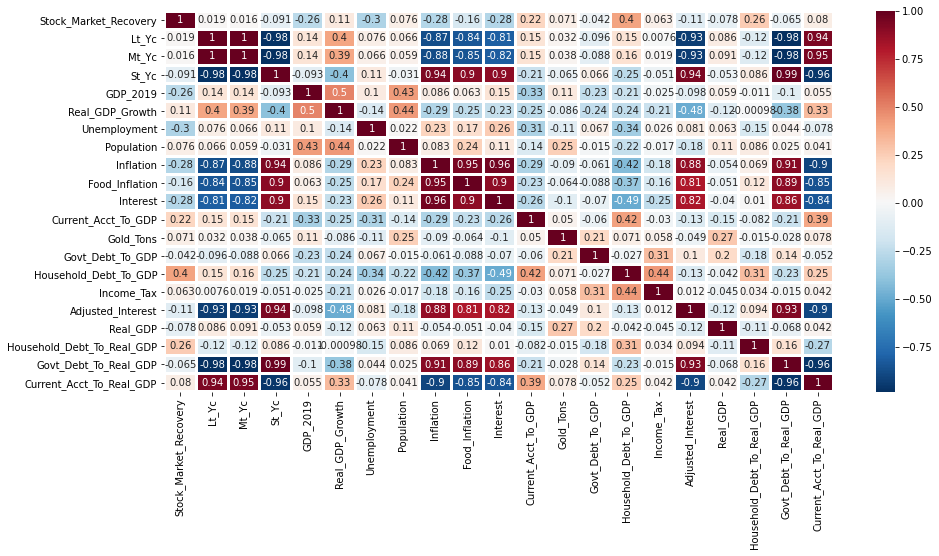

In [7]:
fig, corrmap = plt.subplots(figsize=(15,7))

pearsoncorr = main_data.corr(method='pearson')

corrmap = sns.heatmap(
              pearsoncorr, 
              xticklabels=pearsoncorr.columns,
              yticklabels=pearsoncorr.columns,
              cmap='RdBu_r',
              annot=True,
              linewidth=2.0
          )

plt.show()

Text(0.5, 1.0, 'Interest vs. Real GDP Growth')

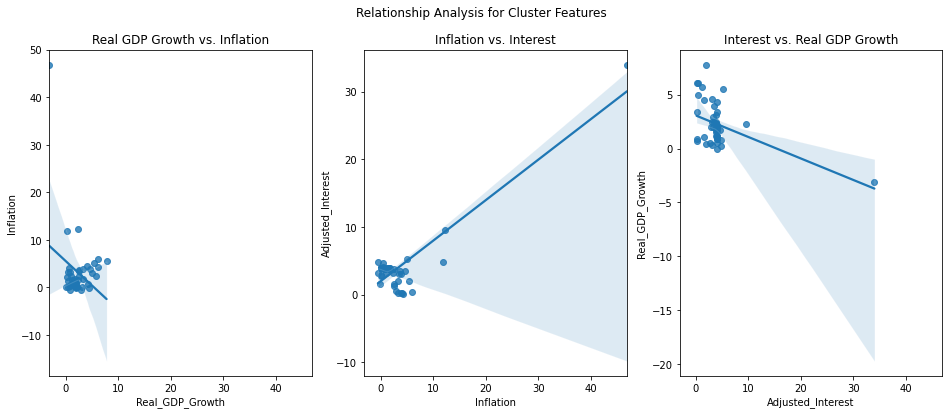

In [8]:
output_data = data[['Country','Real_GDP_Growth','Inflation','Adjusted_Interest']]
cluster_data = main_data[['Real_GDP_Growth','Inflation','Adjusted_Interest']]

fig, axes = plt.subplots(1,3,sharex=True,figsize=(16,6))
fig.suptitle('Relationship Analysis for Cluster Features')
sns.set_style('whitegrid')

sns.regplot(ax=axes[0], x=cluster_data['Real_GDP_Growth'], y=cluster_data['Inflation'])
axes[0].set_title('Real GDP Growth vs. Inflation')

sns.regplot(ax=axes[1], x=cluster_data['Inflation'], y=cluster_data['Adjusted_Interest'])
axes[1].set_title('Inflation vs. Interest')

sns.regplot(ax=axes[2], x=cluster_data['Adjusted_Interest'], y=cluster_data['Real_GDP_Growth'])
axes[2].set_title('Interest vs. Real GDP Growth')

In [9]:
#Outlier search
cdata = cluster_data[(cluster_data['Adjusted_Interest'] > 30) & (cluster_data['Inflation'] > 40)]

#Outlier found at index -> 24
#Dropping index 24 from cluster data
cluster_data = cluster_data.drop(axis=0,index=24)
print(cluster_data)

    Real_GDP_Growth  Inflation  Adjusted_Interest
0               2.4       1.50               3.75
1               6.1       4.30               0.15
2               0.9       0.40               4.10
3               0.5       1.40               4.00
4               6.1       5.91               0.40
5               1.2       1.50               3.90
6               1.2       0.70               4.00
7               0.0       0.10               4.00
8               0.9       3.30               0.25
9               1.5       0.90               3.75
10              2.0       1.00               3.25
11              1.1       2.50               1.50
12              2.2       0.00               4.00
13              1.7       1.80               3.75
14              0.4       3.25               2.00
15              5.0       2.96               0.50
16              1.8       1.40               4.00
17              0.2      11.86               4.75
18              0.8      -0.50               4.75


Text(0.5, 1.0, 'Interest vs. Real GDP Growth')

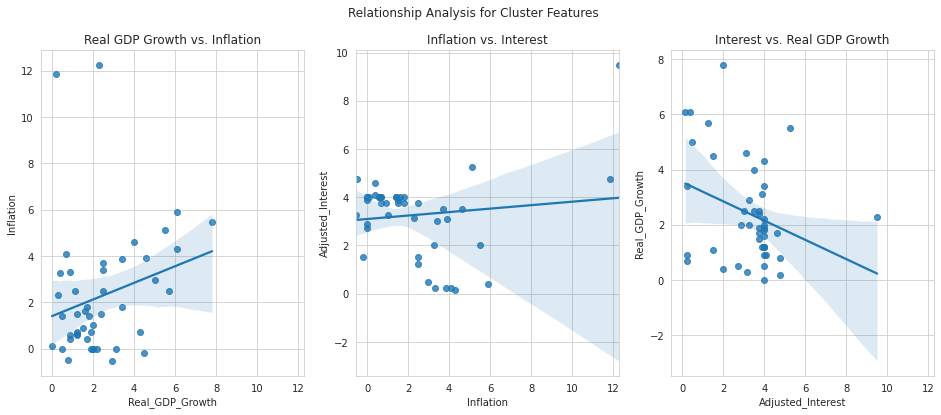

In [10]:
fig, axes = plt.subplots(1,3,sharex=True,figsize=(16,6))
fig.suptitle('Relationship Analysis for Cluster Features')
sns.set_style('whitegrid')

sns.regplot(ax=axes[0], x=cluster_data['Real_GDP_Growth'], y=cluster_data['Inflation'])
axes[0].set_title('Real GDP Growth vs. Inflation')

sns.regplot(ax=axes[1], x=cluster_data['Inflation'], y=cluster_data['Adjusted_Interest'])
axes[1].set_title('Inflation vs. Interest')

sns.regplot(ax=axes[2], x=cluster_data['Adjusted_Interest'], y=cluster_data['Real_GDP_Growth'])
axes[2].set_title('Interest vs. Real GDP Growth')

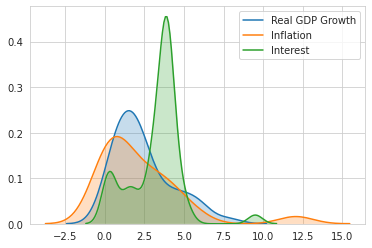

In [11]:
sns.kdeplot(data=cluster_data['Real_GDP_Growth'], label='Real GDP Growth', shade=True)
sns.kdeplot(data=cluster_data['Inflation'], label='Inflation', shade=True)
sns.kdeplot(data=cluster_data['Adjusted_Interest'], label='Interest', shade=True)

In [12]:
scaler = StandardScaler() 
scaler.fit(cluster_data)

# Transforming training and test data
cluster_data = scaler.transform(cluster_data)

# K Means Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300)
kmeans.fit(cluster_data)

# Finding Clusters
clusters = kmeans.cluster_centers_
print(clusters)

[[-0.36209949 -0.48726421  0.32243637]
 [ 1.68891969  0.58316672 -0.78501164]
 [-0.63928078  3.63182852  2.33903367]
 [-0.61174621  0.42115377 -1.45721074]]


In [13]:
# Adjust values of clusters until convergence (recalculating position of clusters based on data points)
y_km = kmeans.fit_predict(cluster_data)
print(y_km)

output_data = output_data.drop(axis=0,index=24)

# New dataframe with cluster results
output = output_data.copy()
output['Cluster'] = y_km
output.sort_values(by=['Cluster'], inplace=True, ascending=True)
print(output)

[0 1 0 0 1 0 0 0 2 0 0 2 0 0 2 1 0 3 0 1 0 0 0 0 3 0 0 0 0 0 1 0 1 2 0 2 1
 1 0 0 0 0 0 0 1 0]
           Country  Real_GDP_Growth  Inflation  Adjusted_Interest  Cluster
0               US              2.4       1.50               3.75        0
21          Sweden              0.9       0.60               4.00        0
23        Thailand              2.9      -0.54               3.25        0
26         Austria              1.6       1.60               4.00        0
27          Norway              1.9       0.70               3.75        0
28         Ireland              4.3       0.70               4.00        0
29          Israel              3.1       0.00               3.90        0
30       Hong Kong              0.3       2.30               3.14        0
32       Singapore              0.5       0.00               2.74        0
35         Denmark              1.7       0.40               4.60        0
39           Chile              2.5       3.70               3.50        0
40   

Cluster 0: Countries with moderate GDP growth, low inflation, and average interest rates.

Cluster 2: Countries with low GDP growth, high inflation, and low interest rates.

Cluster 3: Countries with extreme economic conditions, such as very high inflation.


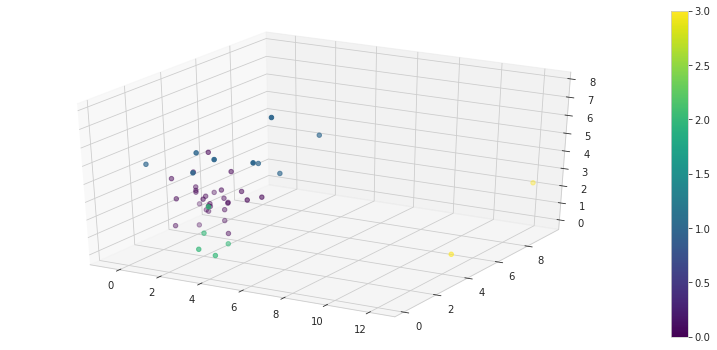

In [14]:
fig2 = plt.figure(figsize=(14,6))
ax = fig2.add_subplot(111, projection='3d')

x = output['Inflation']
y = output['Adjusted_Interest']
z = output['Real_GDP_Growth']
c = output['Cluster']

img = ax.scatter(x, y, z, c=c, cmap='viridis')
fig2.colorbar(img)
plt.show()